In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.01
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_10_51_300_0.01_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_10_51_300_0.01_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2888468376.3834

Best Fitness:	135401355.7522
Solution:	100.0000
Diff:		135401255.7522

[0:00:02][----------] 1.96% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2981260845.9985

Best Fitness:	118059080.4589
Solution:	100.0000
Diff:		118058980.4589

[0:00:05][----------] 3.92% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2844346915.3235

Best Fitness:	100840328.3792
Solution:	100.0000
Diff:		100840228.3792

[0:00:08][#---------] 5.88% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2793041166.2777

Best Fitness:	61920617.0979
Solution:	100.0000
Diff:		61920517.0979

[0:00:11][#---------] 7.84% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	3046876749.1957

Best Fitness:	99964490.7199
Solution:	100.0000
Diff:		99964390.7199

[0:00:14][#---------] 9.80% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	3171139906.9291

Best Fitness:	44993590.9580
Solution:	100.0000
Diff:		44993490.9580

[0:00:17][#---------] 11.76% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2517224079.0232

Best Fitness:	94927672.0358
Solution:	100.0000
Diff:		94927572.0358

[0:00:20][#---------] 13.73% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2761802980.1319

Best Fitness:	106046456.6886
Solution:	100.0000
Diff:		106046356.6886

[0:00:23][##--------] 15.69% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2828048338.1536

Best Fitness:	66476391.7619
Solution:	100.0000
Diff:		66476291.7619

[0:00:26][##--------] 17.65% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2625075592.2345

Best Fitness:	106952933.0932
Solution:	100.0000
Diff:		106952833.0932

[0:00:29][##--------] 19.61% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2549986637.1338

Best Fitness:	96216469.9107
Solution:	100.0000
Diff:		96216369.9107

[0:00:31][##--------] 21.57% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	3014012134.3884

Best Fitness:	44817725.1334
Solution:	100.0000
Diff:		44817625.1334

[0:00:34][##--------] 23.53% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	3012057266.5788

Best Fitness:	72368675.2611
Solution:	100.0000
Diff:		72368575.2611

[0:00:37][###-------] 25.49% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2716134209.3365

Best Fitness:	71981450.1701
Solution:	100.0000
Diff:		71981350.1701

[0:00:39][###-------] 27.45% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2804088290.8211

Best Fitness:	124620750.0996
Solution:	100.0000
Diff:		124620650.0996

[0:00:41][###-------] 29.41% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2549535469.5901

Best Fitness:	39192865.4668
Solution:	100.0000
Diff:		39192765.4668

[0:00:43][###-------] 31.37% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2667247660.2770

Best Fitness:	32618430.5987
Solution:	100.0000
Diff:		32618330.5987

[0:00:45][###-------] 33.33% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2531974354.0635

Best Fitness:	52340892.3446
Solution:	100.0000
Diff:		52340792.3446

[0:00:47][####------] 35.29% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2924937611.2618

Best Fitness:	28519491.9951
Solution:	100.0000
Diff:		28519391.9951

[0:00:48][####------] 37.25% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2973596674.1934

Best Fitness:	33375581.7395
Solution:	100.0000
Diff:		33375481.7395

[0:00:50][####------] 39.22% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2962220096.6782

Best Fitness:	142359333.1428
Solution:	100.0000
Diff:		142359233.1428

[0:00:52][####------] 41.18% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2566114979.7841

Best Fitness:	69723083.6306
Solution:	100.0000
Diff:		69722983.6306

[0:00:54][####------] 43.14% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2421570390.9377

Best Fitness:	32904384.0912
Solution:	100.0000
Diff:		32904284.0912

[0:00:56][#####-----] 45.10% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2895887727.3666

Best Fitness:	31147789.1973
Solution:	100.0000
Diff:		31147689.1973

[0:00:58][#####-----] 47.06% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2334661968.7494

Best Fitness:	75025035.2009
Solution:	100.0000
Diff:		75024935.2009

[0:01:00][#####-----] 49.02% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2569783367.2531

Best Fitness:	19135495.5813
Solution:	100.0000
Diff:		19135395.5813

[0:01:02][#####-----] 50.98% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2686949588.0306

Best Fitness:	59347380.5016
Solution:	100.0000
Diff:		59347280.5016

[0:01:04][#####-----] 52.94% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2683001614.5005

Best Fitness:	75208799.8558
Solution:	100.0000
Diff:		75208699.8558

[0:01:06][#####-----] 54.90% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	3178071289.0629

Best Fitness:	58372254.0680
Solution:	100.0000
Diff:		58372154.0680

[0:01:08][######----] 56.86% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2572201863.8736

Best Fitness:	40680072.6054
Solution:	100.0000
Diff:		40679972.6054

[0:01:10][######----] 58.82% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2908937838.6492

Best Fitness:	146949448.1457
Solution:	100.0000
Diff:		146949348.1457

[0:01:12][######----] 60.78% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2837726742.4895

Best Fitness:	116246995.5298
Solution:	100.0000
Diff:		116246895.5298

[0:01:14][######----] 62.75% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2963720481.9351

Best Fitness:	96012356.9864
Solution:	100.0000
Diff:		96012256.9864

[0:01:16][######----] 64.71% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2624201913.1893

Best Fitness:	38810911.1733
Solution:	100.0000
Diff:		38810811.1733

[0:01:18][#######---] 66.67% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2486634664.1632

Best Fitness:	61323360.3681
Solution:	100.0000
Diff:		61323260.3681

[0:01:20][#######---] 68.63% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2715989824.2679

Best Fitness:	34056295.6049
Solution:	100.0000
Diff:		34056195.6049

[0:01:22][#######---] 70.59% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	3150403458.3424

Best Fitness:	25127203.2584
Solution:	100.0000
Diff:		25127103.2584

[0:01:24][#######---] 72.55% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	3032641111.2703

Best Fitness:	146758599.5753
Solution:	100.0000
Diff:		146758499.5753

[0:01:26][#######---] 74.51% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	3020811372.8975

Best Fitness:	117851906.6614
Solution:	100.0000
Diff:		117851806.6614

[0:01:27][########--] 76.47% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2914050203.6570

Best Fitness:	38413070.2241
Solution:	100.0000
Diff:		38412970.2241

[0:01:29][########--] 78.43% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2845229518.7106

Best Fitness:	50004505.5611
Solution:	100.0000
Diff:		50004405.5611

[0:01:31][########--] 80.39% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2620072420.5762

Best Fitness:	24716565.1676
Solution:	100.0000
Diff:		24716465.1676

[0:01:33][########--] 82.35% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	3043919988.6516

Best Fitness:	68349911.5803
Solution:	100.0000
Diff:		68349811.5803

[0:01:35][########--] 84.31% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2823935501.6666

Best Fitness:	44540170.6567
Solution:	100.0000
Diff:		44540070.6567

[0:01:37][#########-] 86.27% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2593637213.0533

Best Fitness:	53995353.5905
Solution:	100.0000
Diff:		53995253.5905

[0:01:39][#########-] 88.24% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2632547521.1317

Best Fitness:	41186475.7710
Solution:	100.0000
Diff:		41186375.7710

[0:01:41][#########-] 90.20% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	3140074632.1287

Best Fitness:	105898835.5592
Solution:	100.0000
Diff:		105898735.5592

[0:01:43][#########-] 92.16% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2691997877.0918

Best Fitness:	75498216.6909
Solution:	100.0000
Diff:		75498116.6909

[0:01:45][#########-] 94.12% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2643220439.0015

Best Fitness:	58712740.5646
Solution:	100.0000
Diff:		58712640.5646

[0:01:47][##########] 96.08% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2470601244.1300

Best Fitness:	33657045.7323
Solution:	100.0000
Diff:		33656945.7323

[0:01:49][##########] 98.04% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	2707712445.7374

Best Fitness:	73179239.5745
Solution:	100.0000
Diff:		73179139.5745

[0:01:51][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:01:51

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
0,2.003181e+08,3.017799e+08,2.702725e+08,4.001910e+08,4.390345e+08,5.368283e+08,5.394321e+08,5.620323e+08,6.417054e+08,6.751994e+08,...,7.317914e+07,1.413551e+10,5.441256e+09,9.952231e+08,1.905283e+10,3.996099e+09,1.105527e+09,5.850140e+09,1.412045e+10,50
1,2.003181e+08,3.017799e+08,2.702725e+08,4.001910e+08,4.390345e+08,5.368283e+08,5.394321e+08,4.120552e+08,6.417054e+08,6.751994e+08,...,7.317914e+07,1.376064e+09,5.441256e+09,9.952231e+08,7.782472e+09,3.996099e+09,1.885454e+08,5.850140e+09,4.680604e+09,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 135401255.7522008

Best error for run 1: 118058980.458863

Best error for run 2: 100840228.37916394

Best error for run 3: 61920517.0978985

Best error for run 4: 99964390.71985307

Best error for run 5: 44993490.958035424

Best error for run 6: 94927572.03580244

Best error for run 7: 106046356.6885621

Best error for run 8: 66476291.761913374

Best error for run 9: 106952833.0931894

Best error for run 10: 96216369.91074519

Best error for run 11: 44817625.13339357

Best error for run 12: 72368575.26112932

Best error for run 13: 71981350.17010133

Best error for run 14: 124620650.0995963

Best error for run 15: 39192765.466751136

Best error for run 16: 32618330.598663174

Best error for run 17: 52340792.34464928

Best error for run 18: 28519391.995149516

Best error for run 19: 33375481.739462025

Best error for run 20: 142359233.14280087

Best error for run 21: 69722983.63056558

Best error for run 22: 32904284.091245852

Best error for run 23: 31147689.197268024

Best error for run 24: 75024935.20094645

Best error for run 25: 19135395.5813437

Best error for run 26: 59347280.50161691

Best error for run 27: 75208699.85577413

Best error for run 28: 58372154.0679561

Best error for run 29: 40679972.60543904

Best error for run 30: 146949348.14572585

Best error for run 31: 116246895.52977312

Best error for run 32: 96012256.98636974

Best error for run 33: 38810811.173347935

Best error for run 34: 61323260.36807316

Best error for run 35: 34056195.60485734

Best error for run 36: 25127103.25837124

Best error for run 37: 146758499.57534072

Best error for run 38: 117851806.66141988

Best error for run 39: 38412970.2241065

Best error for run 40: 50004405.5610917

Best error for run 41: 24716465.16759557

Best error for run 42: 68349811.58030383

Best error for run 43: 44540070.65672472

Best error for run 44: 53995253.59045392

Best error for run 45: 41186375.77096474

Best error for run 46: 105898735.55917679

Best error for run 47: 75498116.69091217

Best error for run 48: 58712640.56462577

Best error for run 49: 33656945.732284

Best error for run 50: 73179139.57445666

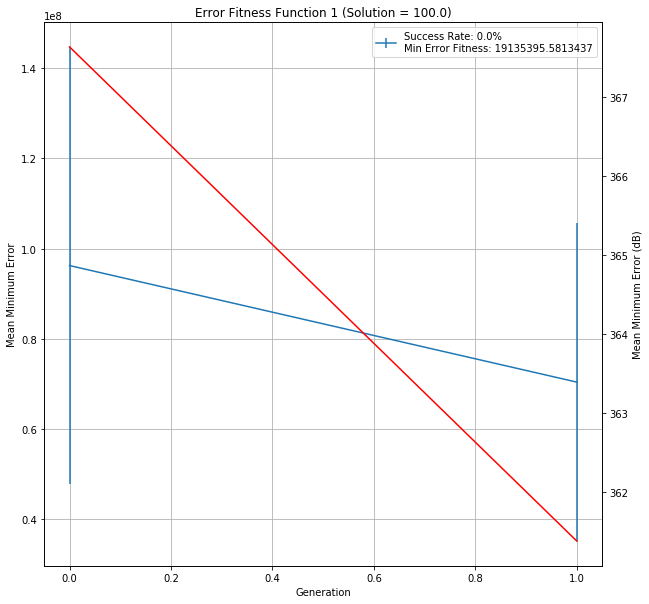

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_10_51_300_0.01_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,10,0.01,1.354013e+08,1.180590e+08,1.008402e+08,6.192052e+07,9.996439e+07,4.499349e+07,...,5.399525e+07,4.118638e+07,1.058987e+08,7.549812e+07,5.871264e+07,3.365695e+07,7.317914e+07,7.032986e+07,0:01:51,1200
